In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [146]:
data = pd.read_csv('ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [147]:
data.isnull().sum() # Veri setinde eksik veri yoktur.

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [148]:
#hangi sınıfların olduğunu görelim
data['class'].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [149]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()
data["class"].value_counts()

class
1    210
0    100
Name: count, dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


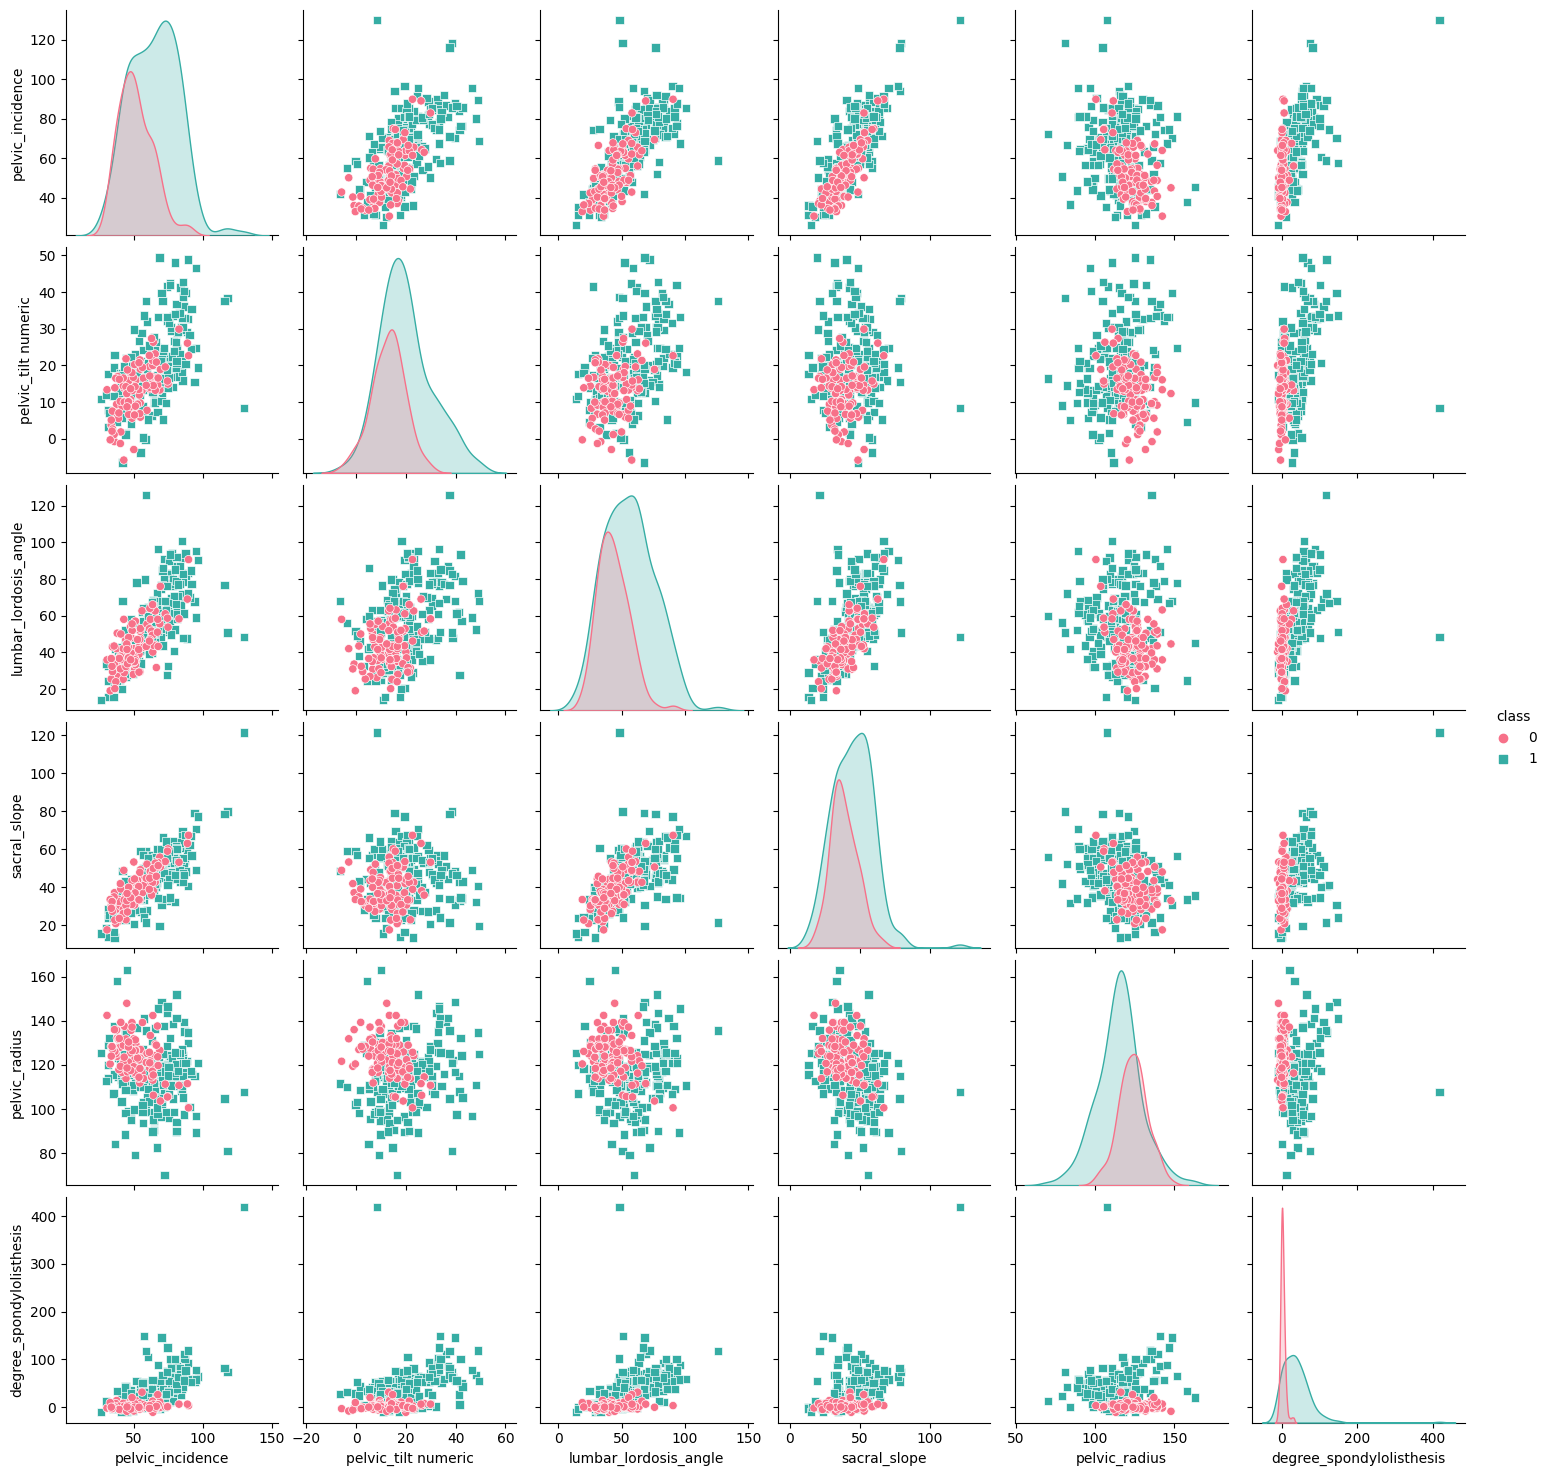

In [151]:
y = data["class"].values #sınıfları y değişkenine atadık
x_data = data.drop(["class"],axis=1) #sınıf hariç tüm verileri x_data değişkenine atadık

#verinin içinde bulunan özelliklerin birbirleri ile ilişkisini yorumlama
sns.pairplot(data, hue="class", markers=["o", "s"], palette="husl")
plt.show()

In [152]:
#data normalization (veri normalizasyonu)   (x-xmin)/(xmax-xmin)
#0-1 arasına çekme işlemi
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))



In [153]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (6, 263)
x_test:  (6, 47)
y_train:  (263,)
y_test:  (47,)


In [154]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [155]:
#test accuracy
test_accuracy = lr.score(x_test.T,y_test.T)
print("test accuracy: {}".format(test_accuracy)) 


test accuracy: 0.7446808510638298


In [156]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  #n_neighbors = k   (k komşu)
knn.fit(x_train.T,y_train.T)

prediction = knn.predict(x_test.T)
print(" {} nn score: {} ".format(4,knn.score(x_test.T,y_test.T)))   #3 komşu ile yapılan tahminin doğruluk oranı


 4 nn score: 0.8723404255319149 


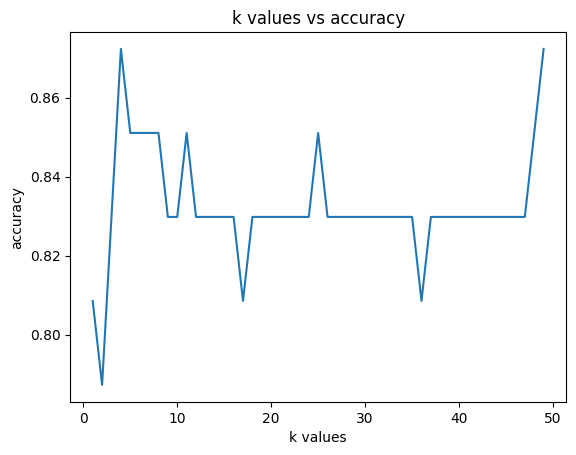

In [157]:
#en iyi k değerini bulma
score_list = []
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train.T,y_train.T)
    score_list.append(knn2.score(x_test.T,y_test.T))

plt.plot(range(1,50),score_list) 
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.title("k values vs accuracy")
plt.show()

In [158]:
#destek vektör makineleri
from sklearn.svm import SVC

#destek vektör makinesi eğitimi
svm = SVC(random_state = 1)
svm.fit(x_train.T,y_train.T)
#test accuracy
print("accuracy of svm algo: ",svm.score(x_test.T,y_test.T))

accuracy of svm algo:  0.851063829787234


In [159]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train.T,y_train.T)

#test accuracy
print("decision tree test accuracy: ",dt.score(x_test.T,y_test.T))

decision tree test accuracy:  0.7446808510638298


In [160]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train.T,y_train.T)

#test accuracy
print("random forest algo test accuracy: ",rf.score(x_test.T,y_test.T))

random forest algo test accuracy:  0.851063829787234


In [162]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test.T)
cm = confusion_matrix(y_test.T,y_pred_lr)
print("logistic regression confusion matrix: \n",cm)

logistic regression confusion matrix: 
 [[ 0 12]
 [ 0 35]]


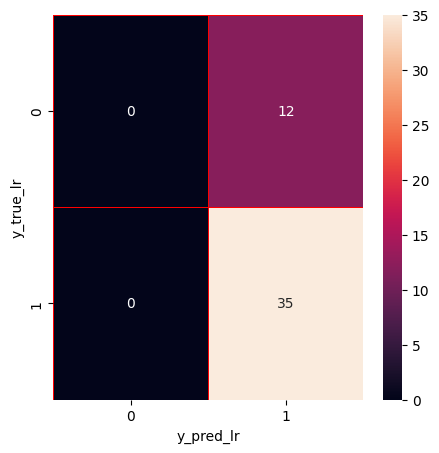

In [163]:
#heatmap
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

